Classification Problem Using Deep Learning

In [141]:
#Import libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.models import Model
from keras.layers import Input

In [104]:
# Load dataset
from keras.datasets import mnist

In [105]:
# Split the dataset
(X_train , y_train) , (X_test , y_test)=mnist.load_data()

In [106]:

# Shape of the dataset
print(X_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


In [107]:

# Reshape of the dataset
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

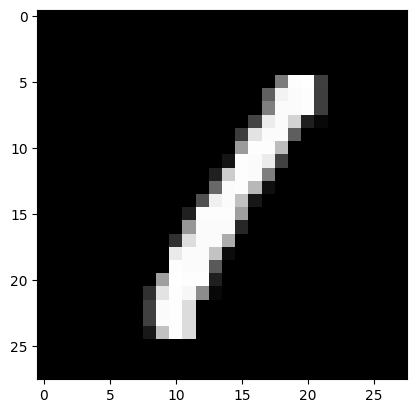

In [109]:
first_img=X_train[3]
first_img=np.array(first_img,dtype='float')
pixels=first_img.reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [110]:
X_train.shape

(60000, 28, 28, 1)

In [111]:
num_classes=10
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [112]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train=X_train/255
X_test=X_test/255

In [113]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [114]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [115]:
# Model training
model.fit(X_train,y_train , batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))
print("The Model has Successfully Trained")

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.1925 - accuracy: 0.9413 - val_loss: 0.0465 - val_accuracy: 0.9841
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0339 - val_accuracy: 0.9884
Epoch 3/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0317 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0297 - val_accuracy: 0.9904
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0268 - val_accuracy: 0.9907
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0293 - val_accuracy: 0.9908
Ep

In [116]:
model.save('mnist.model')
print('Saving the model as mnist.h5')

Saving the model as mnist.h5


In [117]:
new_model=load_model('mnist.model')

In [118]:

prediction=new_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [119]:
print(np.argmax(prediction[5]))

1


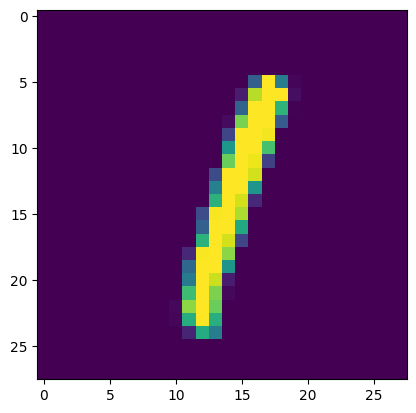

In [120]:

plt.imshow((tf.squeeze(X_test[5])))
plt.show()


In [121]:
model.predict(X_test[1:3])

1/1 [==============================] - 0s 67ms/step


array([[4.58432858e-12, 1.88959626e-09, 1.00000000e+00, 3.17169278e-13,
        2.92742142e-14, 3.83875861e-17, 1.10642696e-10, 7.87651262e-14,
        1.35202544e-14, 1.74691162e-16],
       [9.62665041e-08, 9.99993920e-01, 7.30558952e-07, 2.57185190e-10,
        6.39938037e-07, 2.99742169e-07, 1.00911642e-07, 2.70907350e-07,
        3.91461117e-06, 1.11801834e-09]], dtype=float32)

In [122]:

#predict on the first five images
pred=model.predict(X_test[5:10])
# print our model prediction
print(np.argmax(pred ,axis=1))
print(y_test[5:10])


1/1 [==============================] - 0s 18ms/step
[1 4 9 5 9]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


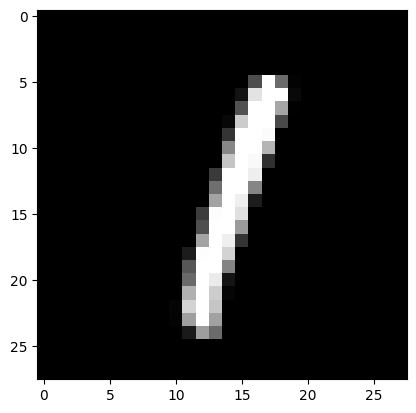

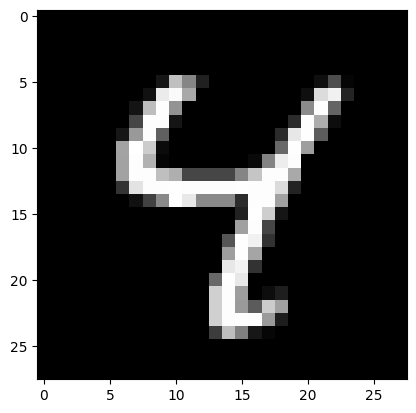

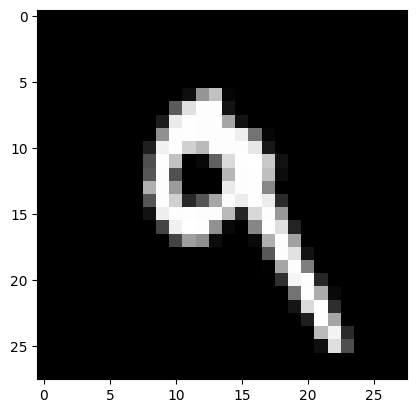

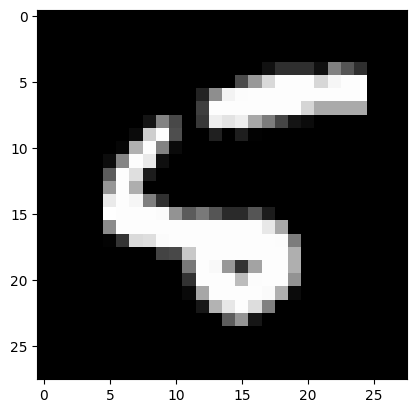

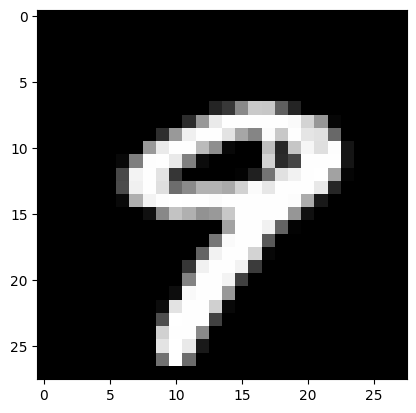

In [123]:
for i in range (5,10):
  first_img=X_test[i]
  first_img=np.array(first_img,dtype='float')
  pixels=first_img.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [124]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i , layer.name , layer.input.shape)

0 conv2d_4 (None, 28, 28, 1)
1 conv2d_5 (None, 26, 26, 32)


In [139]:


# Create a model for feature map extraction
feature_map_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
example_to_extract = X_test[5][np.newaxis, ...]  # Add a batch dimension
feature_maps = feature_map_model.predict(example_to_extract)  # Replace X_test with your test data

1/1 [==============================] - 0s 122ms/step


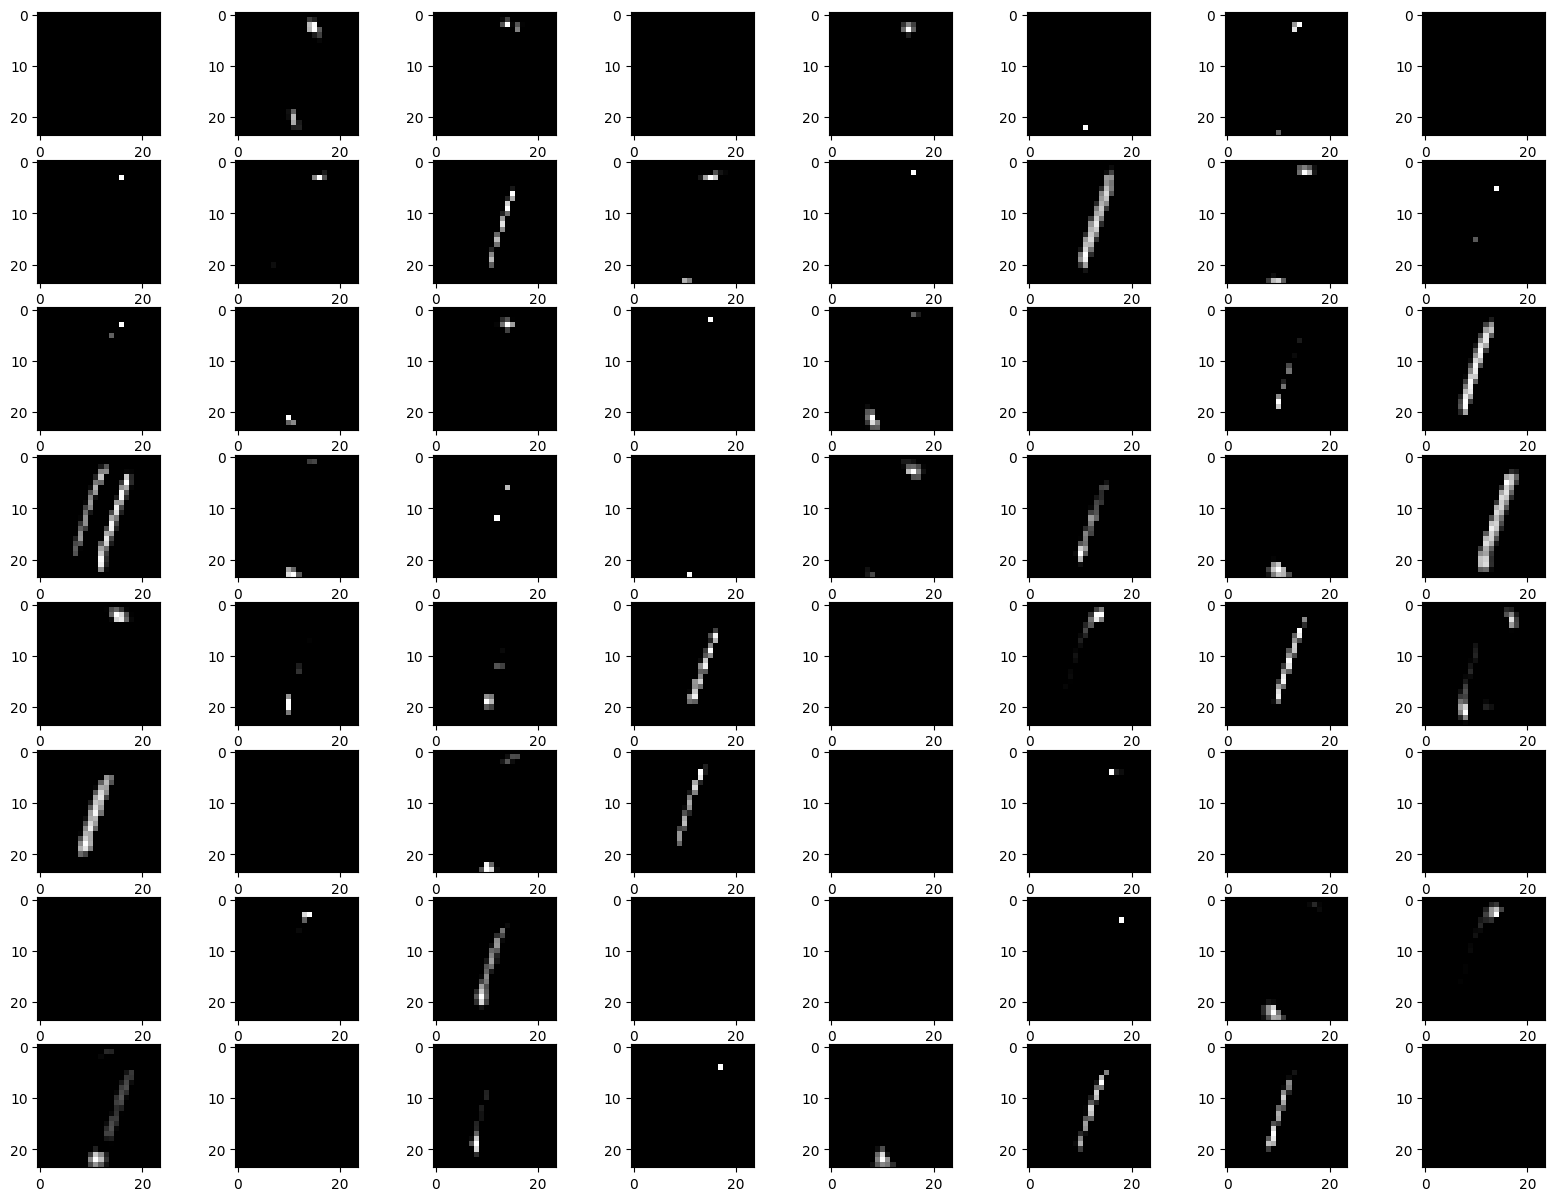

In [140]:


fig = plt.figure(figsize=(20,15))
for i in range(1,feature_maps.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_maps[0,:,:,i-1] , cmap='gray')

plt.show()
